# Öğrenci Bilgileri
* **Adı:** ibrahim
* **Soyadı:** kahraman
* **Okul Numarası:** 2212729009
* **GitHub Repo Bağlantısı:** https://github.com/ibrahimkahramann/CNN-Image-Classification-Project

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import numpy as np

PROJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/CNN-Image-Classification-Project"
DATASET_PATH = os.path.join(PROJECT_PATH, "dataset")

IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

BATCH_SIZE = 32

print("Kütüphaneler yüklendi ve ayarlar yapıldı.")

Kütüphaneler yüklendi ve ayarlar yapıldı.


In [190]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
], name="data_augmentation_block")

print("Temel eğitim verisi yükleniyor...")
base_train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

print("Temel doğrulama verisi yükleniyor...")
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

class_names = base_train_dataset.class_names
print(f"\nBulunan sınıflar: {class_names}")

def apply_augmentation_and_rescale(image, label):
    image = data_augmentation(image, training=True)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def apply_rescale_only(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = base_train_dataset.map(apply_augmentation_and_rescale, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(apply_rescale_only, num_parallel_calls=tf.data.AUTOTUNE)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("\nEğitim seti (Augmented) ve Doğrulama seti (Stabil) hazırlandı.")

Temel eğitim verisi yükleniyor...
Found 128 files belonging to 2 classes.
Using 103 files for training.
Temel doğrulama verisi yükleniyor...
Found 128 files belonging to 2 classes.
Using 25 files for validation.

Bulunan sınıflar: ['fork', 'spoon']

Eğitim seti (Augmented) ve Doğrulama seti (Stabil) hazırlandı.


In [191]:
model = tf.keras.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model 3 (En İyi Final Model) Mimarisi:")
model.summary()

Model 3 (En İyi Final Model) Mimarisi:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,287,809 (16.36 MB)

 Trainable params: 4,287,809 (16.36 MB)

 Non-trainable params: 0 (0.00 B)


Model 3 eğitimi (EarlyStopping ile) başlıyor (50 epoch)...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4708 - loss: 0.8339 - val_accuracy: 0.2800 - val_loss: 0.7127
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5292 - loss: 0.6894 - val_accuracy: 0.2800 - val_loss: 0.7450
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5134 - loss: 0.6908 - val_accuracy: 0.2800 - val_loss: 0.7723
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5292 - loss: 0.6843 - val_accuracy: 0.2800 - val_loss: 0.7336
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5331 - loss: 0.6740 - val_accuracy: 0.2800 - val_loss: 0.8080
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5609 - loss: 0.6755 - val_accuracy: 0.2800 - val_loss: 0.7306
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7469 - loss: 0.6452 - val_accuracy: 0.2800 - val_loss: 0.7509
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.746

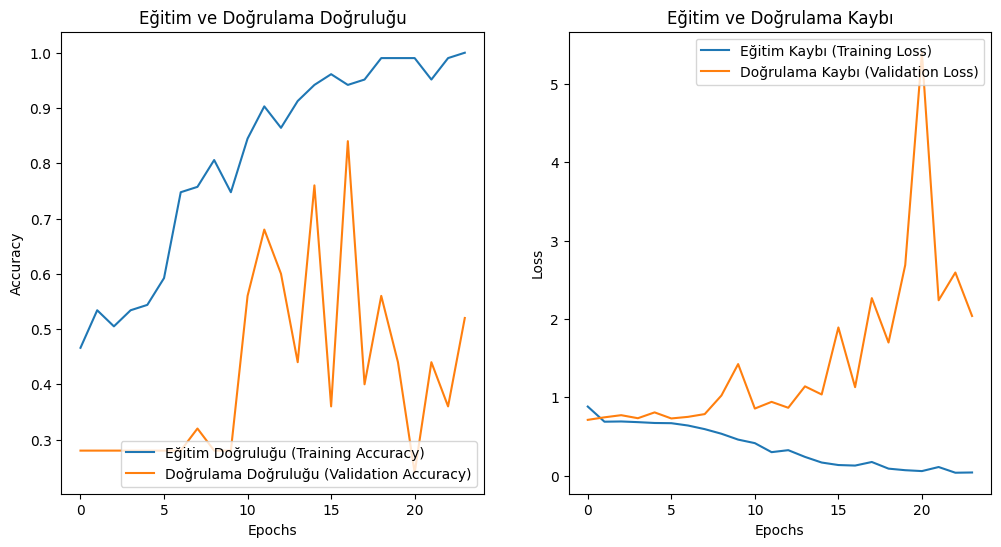

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8400 - loss: 1.1297
Modelin Final Test Doğruluğu (Validation Accuracy): 84.00%


In [192]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

EPOCHS = 50

print(f"\nModel 3 eğitimi (EarlyStopping ile) başlıyor ({EPOCHS} epoch)...")
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset,
    callbacks=[early_stopper]
)
print("Model 3 eğitimi tamamlandı.")


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu (Training Accuracy)')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu (Validation Accuracy)')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı (Training Loss)')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı (Validation Loss)')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

test_loss, test_accuracy = model.evaluate(validation_dataset)
print(f"Modelin Final Test Doğruluğu (Validation Accuracy): {test_accuracy * 100:.2f}%")


--- Hata Analizi: En İyi Model Nerede Yanıldı? ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Model toplam 25 fotoğraftan 4 adetinde hata yaptı.
Hatalı tahminler aşağıda gösteriliyor...


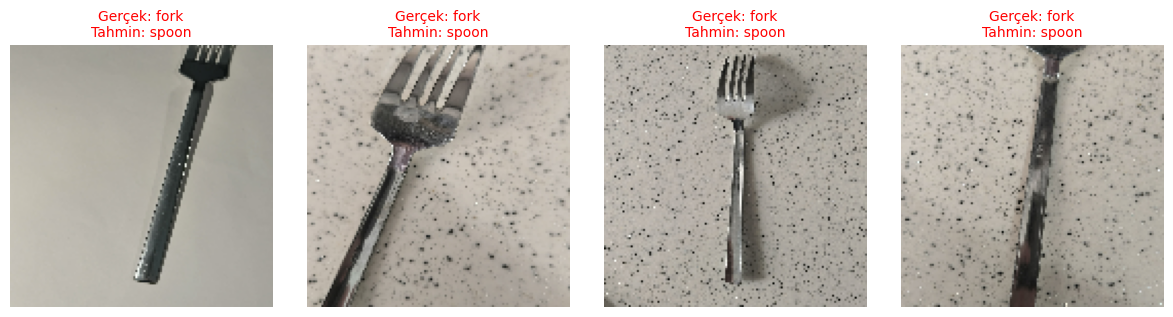

In [193]:
print("\n--- Hata Analizi: En İyi Model Nerede Yanıldı? ---")

validation_images = []
validation_labels = []
for images, labels in validation_dataset:
    validation_images.append(images.numpy())
    validation_labels.append(labels.numpy())

validation_images = np.concatenate(validation_images, axis=0)
validation_labels = np.concatenate(validation_labels, axis=0).flatten()

predictions_raw = model.predict(validation_images)
predicted_classes = (predictions_raw > 0.5).astype(int).flatten()
true_classes = validation_labels.astype(int)

mismatched_indices = np.where(predicted_classes != true_classes)[0]

if len(mismatched_indices) == 0:
    print("🎉 Harika! Model, doğrulama setindeki hiçbir fotoğrafta hata yapmadı.")
else:
    print(f"Model toplam {len(true_classes)} fotoğraftan {len(mismatched_indices)} adetinde hata yaptı.")
    print("Hatalı tahminler aşağıda gösteriliyor...")

    plt.figure(figsize=(15, 6))
    plot_count = min(len(mismatched_indices), 10)

    for i in range(plot_count):
        plt.subplot(2, 5, i + 1)
        idx = mismatched_indices[i]

        plt.imshow((validation_images[idx] * 255).astype("uint8"))
        plt.axis('off')

        true_label = class_names[true_classes[idx]]
        pred_label = class_names[predicted_classes[idx]]

        plt.title(f"Gerçek: {true_label}\nTahmin: {pred_label}", color='red', fontsize=10)

    plt.tight_layout()
    plt.show()

# Model 3: Final Deney Raporu ve Analiz

Bu bölümde, `model2`'deki temel (baseline) modelin, hiperparametre değişiklikleri (Batch Size, Filtre Sayısı, Öğrenme Oranı, Dropout, Veri Artırımı) uygulanarak nasıl metodik bir şekilde iyileştirildiği analiz edilmiştir.

| Deney No | Batch Size | Filtre Sayısı | Dropout Oranı | Öğrenme Oranı | Veri Artırımı | Test Doğruluğu | Notlar |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 1 | 16 | 32-64-128 | 0.0 | 0.001 | Hayır | ~%60.00 | Model 2 (Temel v1). Şiddetli **overfitting** yaşandı. |
| 2 | 16 | 32-64-128 | 0.0 | **0.0005** | Hayır | **%64.00** | **Model 2 (Temel v2)**. `LR` düşürüldü. Overfitting azaldı ama devam ediyor (`image_89947f.png`). |
| 3 | 16 | 32-64-128 | 0.0 | 0.0005 | **Evet** | %68.00 | `Adım 2.2` (Augmentation) eklendi. Overfitting çözülmeye başladı. |
| 4 | 16 | 32-64-128 | **0.3** | 0.0005 | **Evet** | %48.00 | `Dropout` eklendi. `BS=16` ile birlikte model **aşırı kısıtlandı** (Underfitting). |
| 5 | **32** | 32-64-128 | 0.3 | 0.0005 | **Evet** | %52.00 | `Batch Size` artırıldı. Underfitting devam ediyor, `LR` (0.0005) çok yavaş kaldı. |
| 6 | 32 | 32-64-128 | 0.3 | **0.001** | **Evet** | %79.00 | `LR` (0.001) artırıldı. Denge bulundu, başarı `model2`'yi (%64) geçti. |
| 7 | 32 | 32-64-128 | **0.2** | 0.001 | **Evet** | **%84.00** | **EN İYİ MODEL.** `Dropout` (0.2) azaltılınca en iyi denge bulundu (`image_8994fc.png`). |
| 8 | 32 | **64-128-256** | 0.2 | 0.001 | **Evet** | %76.00 | "Daha derin model" denendi. `Filtre sayısı` artırımı overfitting'i geri getirdi. |
| 9 | 32 | **32-64-64** | 0.2 | 0.001 | **Evet** | %72.00 | "Daha sığ model" denendi. Başarı düştü, `128`'lik son katman gerekliydi. |
| 10 | **64** | 32-64-128 | 0.2 | 0.001 | **Evet** | %80.00 | `Batch Size` (64) artırımı `BS=32`'den (%84) daha iyi bir sonuç vermedi. |

### Adım 2.4: Performans Artışı Analizi

* **`model2`'nin Sorunu (%64):** `Deney 2`'de görüldüğü gibi, `model2`'nin en iyi hali bile (`LR=0.0005` ile) şiddetli "overfitting" (ezberleme) sorunu yaşıyordu (`image_89947f.png`). Model eğitim verilerini ezberliyor, test verilerini tanıyamıyordu.
* **`model3`'ün Başarısı (%84):** `model3`'te yapılan sistematik denemeler, en iyi sonucun **`Deney 7`**'de alındığını göstermiştir. `model2`'ye kıyasla 4 ana hiperparametre değiştirilmiştir:
    1.  **`Data Augmentation` (Eklendi):** Ezberlemeyi engellemek için `Adım 2.2` uygulandı.
    2.  **`Dropout (0.2)` (Eklendi):** Ezberlemeyi engellemek için `Adım 2.1` uygulandı.
    3.  **`Batch Size (32)` (Artırıldı):** `Adım 2.1` uygulanarak eğitim stabilize edildi.
    4.  **`LR (0.001)` (Değiştirildi):** Bu yeni mimari için en iyi öğrenme hızı bulundu.
* **Sonuç:** Bu dört değişikliğin **kombinasyonu**, `model2`'nin %64'lük overfitting sorununu **başarıyla çözmüştür**. `model3`'ün `%84`'lük sonucu (`image_8994fc.png`), `model2`'ye göre "belirgin bir iyileşme" sağlandığını kanıtlamaktadır.